In [67]:
import networkx as nx
import csv

G = nx.MultiGraph()

In [68]:
with open('data.csv') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for row in csv_reader:
            print(row)

['1', 'ABC1', '1.2.3.4', 'Delhi', 'Apple']
['2', 'ABC2', '1.2.3.5', 'Kolkata', 'Apple']
['3', 'ABC1', '1.3.4.5', 'Kolkata', 'Apple']
['4', 'ABC3', '1.2.3.4', 'Delhi', 'Apple']
['5', 'ABC3', '1.3.4.5', 'Delhi', 'Apple']
['6', 'ABC2', '1.2.3.5', 'Delhi', 'Android']
['7', 'ABC1', '1.3.4.5', 'Delhi', 'Android']
['8', 'ABC2', '1.2.3.4', 'Delhi', 'Apple']
['9', 'ABC1', '1.2.3.4', 'Delhi', 'Apple']
['10', 'ABC2', '1.2.3.5', 'Kolka', 'Apple']


In [80]:
with open('data.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    ids=[]
    for row in csv_reader:
        ids.append(row[0])
        new_node = row[0]  # first element in row
        new_attributes = row[1:]  # whole row except the first element
        
        # Add the new node and its attributes to the graph
        G.add_node(new_node, my_attributes=new_attributes)  # attributes are stored as a list

        # Add edges based on existing nodes
        for node, attrs in G.nodes(data=True):
            # Skip node we just added
            if node != new_node:
                shared_attributes = [attr for attr in attrs['my_attributes'] if attr in new_attributes]
                # Add edges between nodes based on the number of shared attributes
                for attr in shared_attributes:
                    G.add_edge(node, new_node,common_attribute=attr)


In [82]:
for edge in G.edges():
    print('EDGE:', edge, '| COMMON ATTRIBUTES:', set(G.nodes[edge[0]]['my_attributes']) & set(G.nodes[edge[1]]['my_attributes']))

EDGE: ('1', '2') | COMMON ATTRIBUTES: {'Apple'}
EDGE: ('1', '2') | COMMON ATTRIBUTES: {'Apple'}
EDGE: ('1', '2') | COMMON ATTRIBUTES: {'Apple'}
EDGE: ('1', '3') | COMMON ATTRIBUTES: {'ABC1', 'Apple'}
EDGE: ('1', '3') | COMMON ATTRIBUTES: {'ABC1', 'Apple'}
EDGE: ('1', '3') | COMMON ATTRIBUTES: {'ABC1', 'Apple'}
EDGE: ('1', '3') | COMMON ATTRIBUTES: {'ABC1', 'Apple'}
EDGE: ('1', '3') | COMMON ATTRIBUTES: {'ABC1', 'Apple'}
EDGE: ('1', '3') | COMMON ATTRIBUTES: {'ABC1', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.3.4', 'Delhi', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.3.4', 'Delhi', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.3.4', 'Delhi', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.3.4', 'Delhi', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.3.4', 'Delhi', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.3.4', 'Delhi', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.3.4', 'Delhi', 'Apple'}
EDGE: ('1', '4') | COMMON ATTRIBUTES: {'1.2.

In [46]:
G.number_of_edges('1', '9')

4

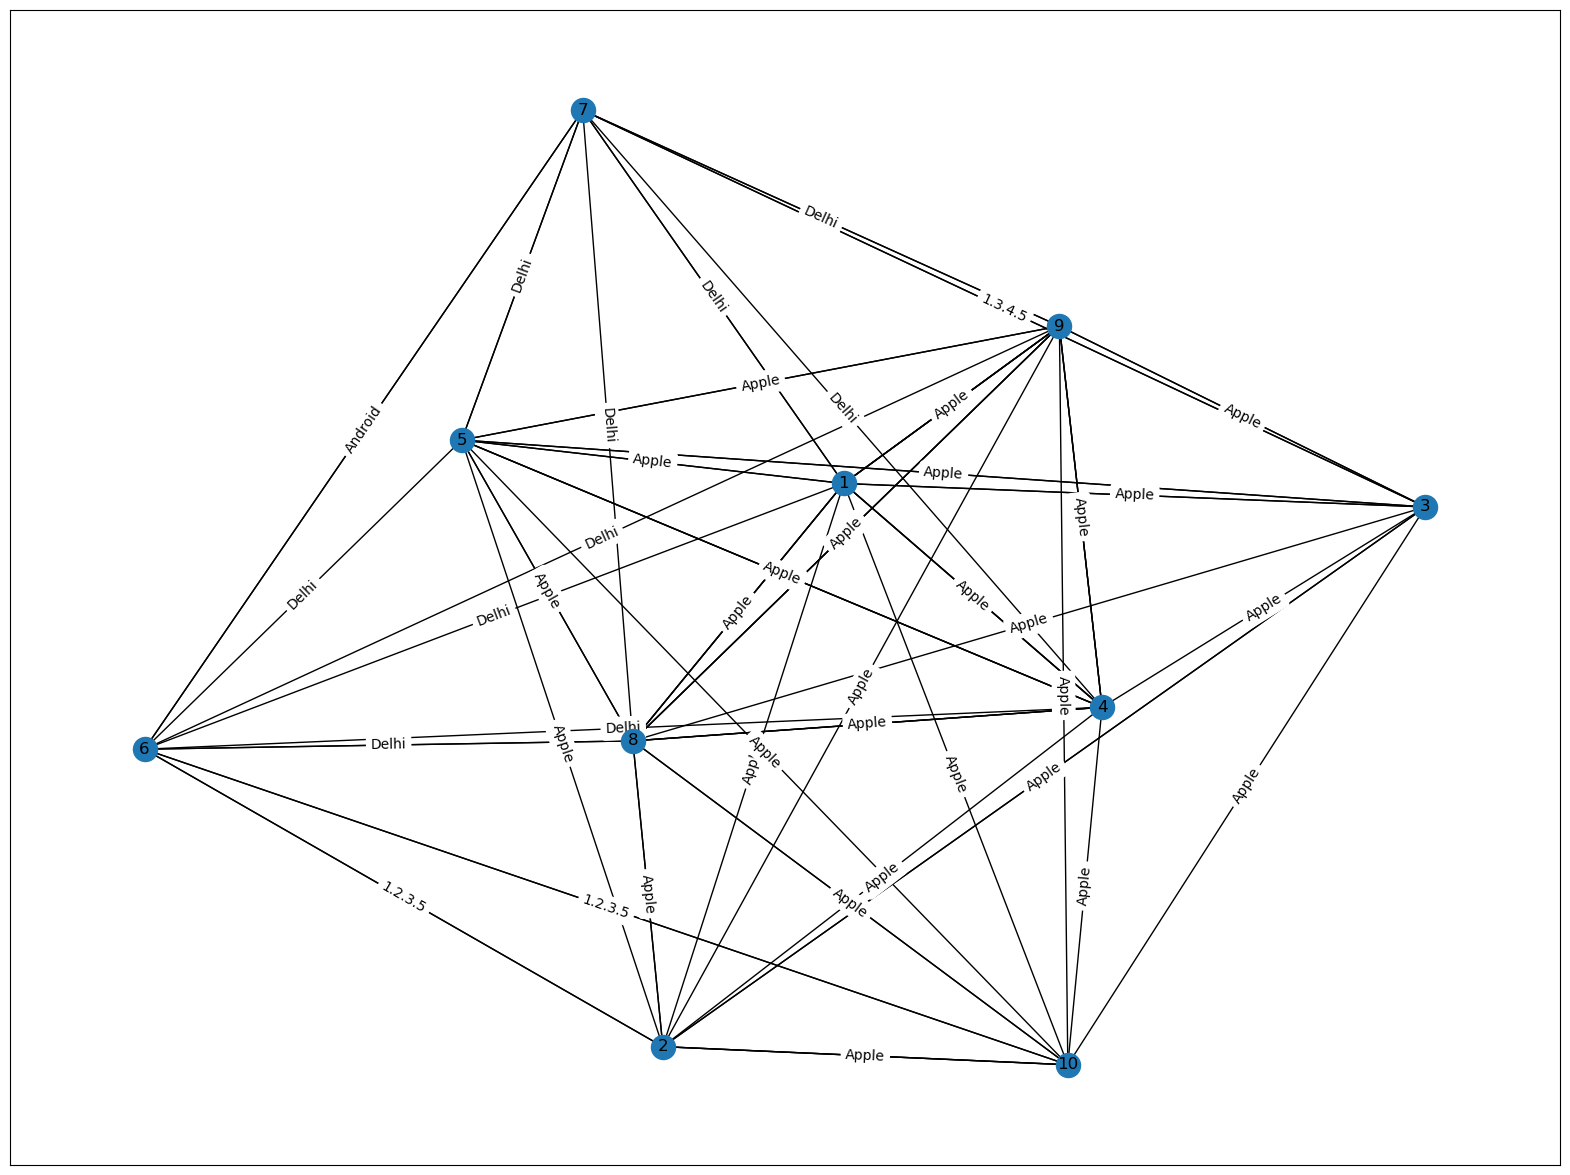

In [63]:
# Draw the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos)

# Draw labels for edges (with attribute names)
edge_labels = {(u, v): d["common_attribute"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.show()

In [140]:
check='1'
start=[]
end=[]
comm_attrib=[]
temp_attrib=[]
for u,v,d in G.edges(data=True):
    if u==check:
        if v not in end and len(end)==0:
            start.append(u)
            end.append(v)
            temp_attrib.append(d['common_attribute'])
        elif v not in end:
            start.append(u)
            end.append(v)
            comm_attrib.append(list(set(temp_attrib)))
            temp_attrib=[]
            temp_attrib.append(d['common_attribute'])
        temp_attrib.append(d['common_attribute'])
    else:
        comm_attrib.append(list(set(temp_attrib)))
        break
feat_length=[len(i) for i in comm_attrib]

In [142]:
import pandas as pd
df=pd.DataFrame(columns=['Start','Stop','Common_Features','Comm_Feat_Count'])
df

,Start,Stop,Common_Features,Comm_Feat_Count


In [143]:
len(feat_length)

9

In [144]:
df['Start']=start
df['Stop']=end
df['Common_Features']=comm_attrib
df['Comm_Feat_Count']=feat_length
df['Probability']=df['Comm_Feat_Count']/len(new_attributes)

In [145]:
df

,Start,Stop,Common_Features,Comm_Feat_Count,Probability
0,1,2,[Apple],1,0.25
1,1,3,"[ABC1, Apple]",2,0.50
2,1,4,"[1.2.3.4, Delhi, Apple]",3,0.75
3,1,5,"[Apple, Delhi]",2,0.50
4,1,6,[Delhi],1,0.25
5,1,7,"[ABC1, Delhi]",2,0.50
6,1,8,"[1.2.3.4, Delhi, Apple]",3,0.75
7,1,9,"[1.2.3.4, ABC1, Delhi, Apple]",4,1.00
8,1,10,[Apple],1,0.25
